In [1]:
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import xarray as xr
import dask
%matplotlib inline

In [25]:
ppdir = "/work/Hemant.Khatri/MOM6_idealised/SWM_Two_Layer/test/"
ds = xr.open_dataset(ppdir+"prog.nc")#,decode_times=False)

In [26]:
ds

<xarray.Dataset>
Dimensions:  (Time: 100, xh: 800, xq: 800, yh: 400, yq: 400, zi: 3, zl: 2)
Coordinates:
  * xq       (xq) float64 4.0 8.0 12.0 16.0 ... 3.192e+03 3.196e+03 3.2e+03
  * yh       (yh) float64 2.0 6.0 10.0 14.0 ... 1.59e+03 1.594e+03 1.598e+03
  * zl       (zl) float64 1.031e+03 1.033e+03
  * Time     (Time) object 0001-01-11 00:00:00 ... 0003-09-28 00:00:00
  * xh       (xh) float64 2.0 6.0 10.0 14.0 ... 3.19e+03 3.194e+03 3.198e+03
  * yq       (yq) float64 4.0 8.0 12.0 16.0 ... 1.592e+03 1.596e+03 1.6e+03
  * zi       (zi) float64 1.03e+03 1.032e+03 1.034e+03
Data variables:
    u        (Time, zl, yh, xq) float32 ...
    v        (Time, zl, yq, xh) float32 ...
    h        (Time, zl, yh, xh) float64 ...
    e        (Time, zi, yh, xh) float32 ...
Attributes:
    filename:   prog.nc
    title:      MOM Two-Layer Experiment
    grid_type:  regular
    grid_tile:  N/A

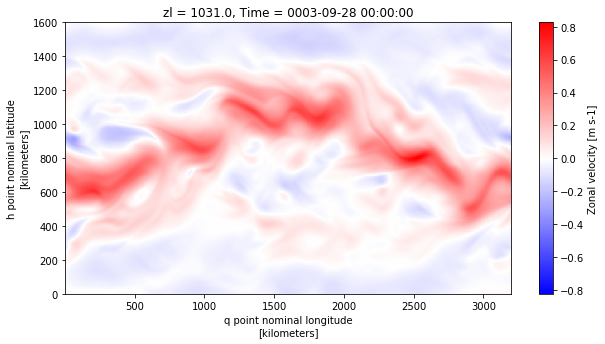

In [16]:
u1 = ds.u.isel(Time = 99, zl=0)
u1.plot(figsize=[10,5], cmap='bwr')

In [17]:
um = (ds.u)**2
um = um.mean({'yh','xq'})

In [18]:
um.load()

<xarray.DataArray 'u' (Time: 100, zl: 2)>
array([[0.00026481, 0.00025329],
       [0.00096539, 0.00092856],
       [0.00177805, 0.00171189],
       [0.00272955, 0.00263413],
       [0.00339469, 0.00322741],
       [0.00385045, 0.00364824],
       [0.00406589, 0.00377819],
       [0.00384191, 0.00357597],
       [0.00353037, 0.00328552],
       [0.00294964, 0.00266336],
       [0.0023785 , 0.0021566 ],
       [0.00184814, 0.00159466],
       [0.00128701, 0.00117378],
       [0.00089495, 0.00088286],
       [0.00059261, 0.00066205],
       [0.00045971, 0.00065086],
       [0.0005551 , 0.00073157],
       [0.00071984, 0.00104335],
       [0.0009886 , 0.00138556],
       [0.00124497, 0.00178547],
       [0.00141829, 0.00204995],
       [0.00153891, 0.00214297],
       [0.00149402, 0.00208169],
       [0.00136997, 0.00180751],
       [0.00116306, 0.00149567],
       [0.00099029, 0.0011107 ],
       [0.00096076, 0.00082963],
       [0.00116929, 0.00071946],
       [0.00164478, 0.00080072],
 

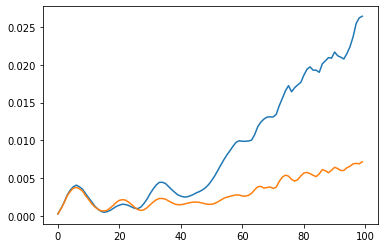

In [22]:
plt.plot(um)

In [23]:
ds.close()

# Test against Navid's simulations

In [2]:
ppdir = "/work/Hemant.Khatri/MOM6_idealised/SWM_Two_Layer/test_Navid/"
ds = xr.open_dataset(ppdir+"prog.nc")

In [3]:
ds

<xarray.Dataset>
Dimensions:  (Time: 365, xh: 800, xq: 800, yh: 400, yq: 400, zi: 3, zl: 2)
Coordinates:
  * xq       (xq) float64 4.0 8.0 12.0 16.0 ... 3.192e+03 3.196e+03 3.2e+03
  * yh       (yh) float64 2.0 6.0 10.0 14.0 ... 1.59e+03 1.594e+03 1.598e+03
  * zl       (zl) float64 1.027e+03 1.028e+03
  * Time     (Time) object 0001-01-11 00:00:00 ... 0010-12-30 00:00:00
  * xh       (xh) float64 2.0 6.0 10.0 14.0 ... 3.19e+03 3.194e+03 3.198e+03
  * yq       (yq) float64 4.0 8.0 12.0 16.0 ... 1.592e+03 1.596e+03 1.6e+03
  * zi       (zi) float64 1.027e+03 1.028e+03 1.028e+03
Data variables:
    u        (Time, zl, yh, xq) float32 ...
    v        (Time, zl, yq, xh) float32 ...
    h        (Time, zl, yh, xh) float64 ...
    e        (Time, zi, yh, xh) float32 ...
Attributes:
    filename:   prog.nc
    title:      MOM Two-Layer Experiment
    grid_type:  regular
    grid_tile:  N/A

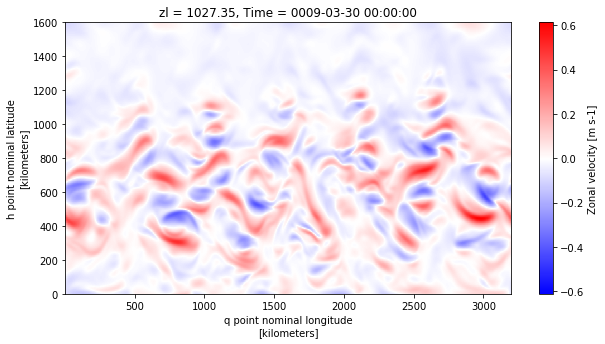

In [9]:
u1 = ds.u.isel(Time = 300, zl=0)
u1.plot(figsize=[10,5], cmap='bwr')

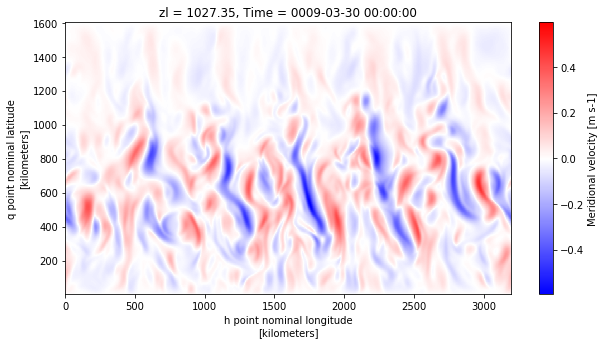

In [11]:
v1 = ds.v.isel(Time = 300, zl=0)
#v1 = np.sqrt(v1**2)
v1.plot(figsize=[10,5], cmap='bwr')

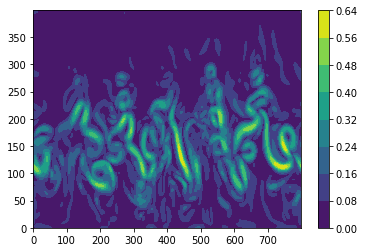

In [19]:
ke = np.sqrt(u1.values**2 + v1.values**2)
plt.contourf(ke)
plt.colorbar()

In [15]:
um = (ds.u)**2
um = um.mean({'yh','xq'})


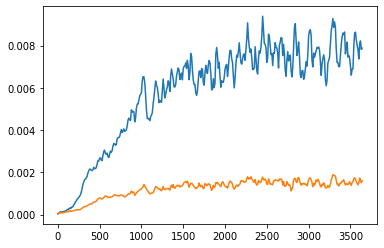

In [18]:
plt.plot(np.arange(0,3650, 10), um)

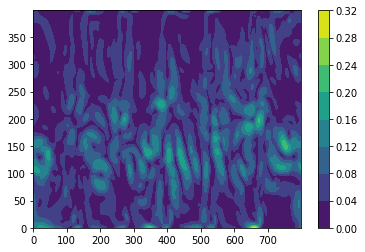

In [20]:
u2 = ds.u.isel(Time = 300, zl=1)
v2 = ds.v.isel(Time = 300, zl=1)
ke = np.sqrt(u2.values**2 + v2.values**2)
plt.contourf(ke)
plt.colorbar()